In [6]:
import pandas as pd

df = pd.read_excel('/Users/jiwanhwang/Documents/GitHub/Practice_MachineLearning/Default_of_Credit_Card/default_credit_card.xls', 
                   header=1, index_col='ID', sheet_name='Data')
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [7]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y = df['default']
X = df.drop('default', axis=1)

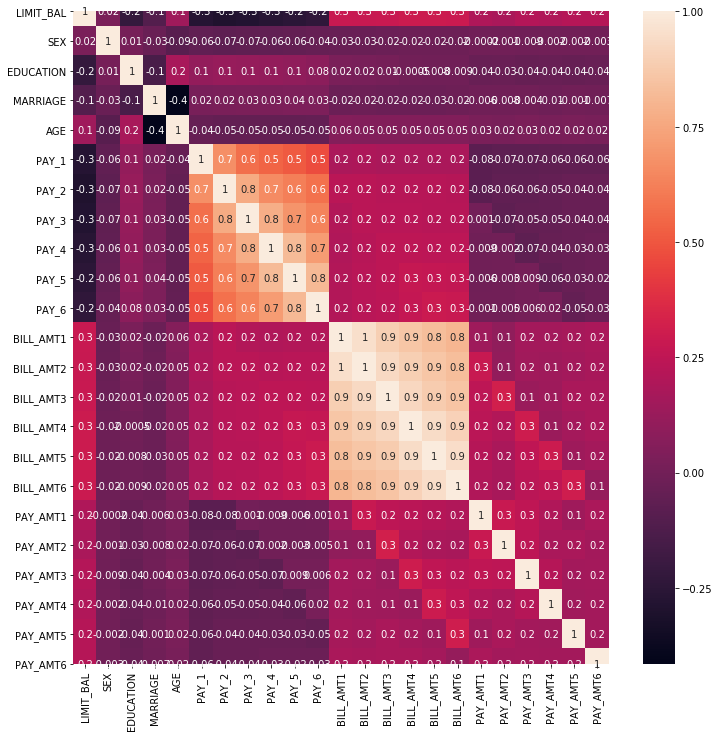

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.1g')

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('Variance Ratio per each PCA Component:', pca.explained_variance_ratio_)

Variance Ratio per each PCA Component: [0.90555253 0.0509867 ]


In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rf_clf, X, y, scoring='accuracy', cv=3)

print('Accurcy for each fold:', scores)
print('AVG accuracy:', round(np.mean(scores), 4))

Accurcy for each fold: [0.8083 0.8196 0.8232]
AVG accuracy: 0.817


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rf_clf, df_pca, y, scoring='accuracy', cv=3)

print('PCA - Accurcy for each fold:', scores_pca)
print('PCA - AVG accuracy:', round(np.mean(scores_pca), 4))

PCA - Accurcy for each fold: [0.7928 0.7951 0.8025]
PCA - AVG accuracy: 0.7968
